In [2]:
import matplotlib.pyplot as plt
import spikeextractors as se
import spiketoolkit as st
import spikeinterface.full as si

In [5]:
# Reading and sorting the mda recording
recording = si.read_mda_recording("/Volumes/Hippocampus/Data/picasso-misc/20181105/mountains/channel019/dataset",  raw_fname='raw_data.mda')
recording_filtered = si.bandpass_filter(recording)
sorting = si.read_mda_sorting("/Volumes/Hippocampus/Data/picasso-misc/20181105/mountains/channel019/output/firings.mda", 30000)

# extract waveforms 
# sparse is important because make everything faster!!!
waveform_folder = '/Volumes/Hippocampus/Data/picasso-misc/20181105/mountains/channel019/wave3'


TypeError: can only concatenate str (not "PosixPath") to str

In [4]:
#Extracting Waveforms output

job_kwargs = dict(n_jobs=10, chunk_duration='1s', progress_bar=True,)
we = si.extract_waveforms(
    recording_filtered, sorting, waveform_folder,
    max_spikes_per_unit=500,
    ms_before=1.5, ms_after=2.5,
    sparse=True,
    **job_kwargs
)
# # compute the noise level a faster opening in sigui
# si.compute_noise_levels(we)

# # optionally compute more stuff using the spikeinterface.postprocessing module
# # principal components, template similarity, spike amplitudes
# # This will enable to display more views
# si.compute_principal_components(we,
#     n_components=3,
#     mode='by_channel_local',
#     whiten=True)
# si.compute_template_similarity(we,  method='cosine_similarity')
# si.compute_spike_amplitudes(we, **job_kwargs)

NameError: name 'recording_filtered' is not defined

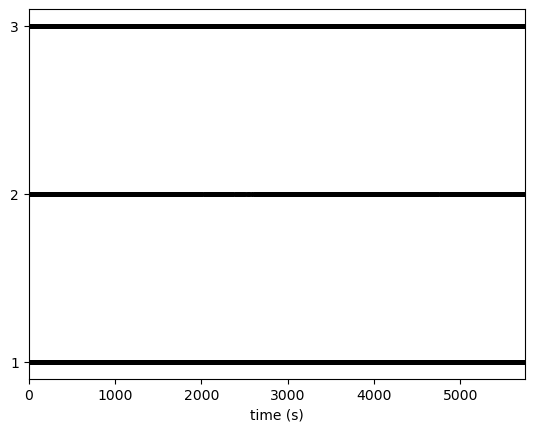

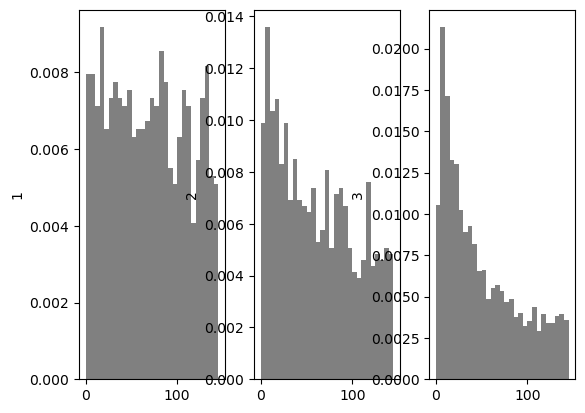

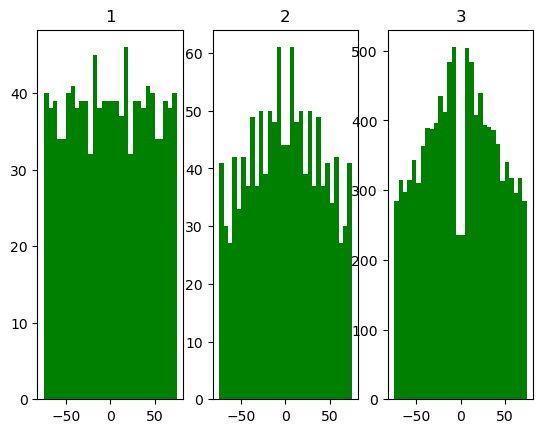

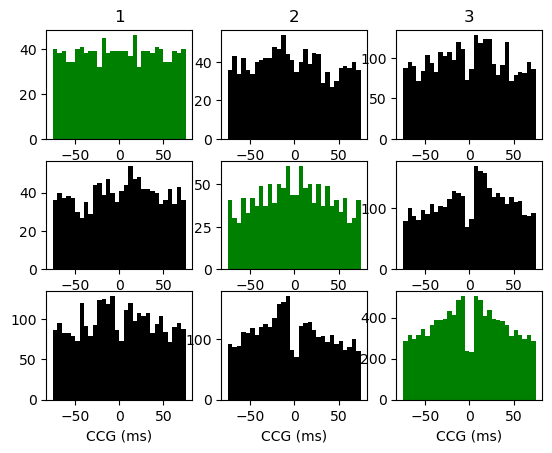

In [8]:
import spikeinterface.widgets as siw
w_rs = siw.plot_rasters(sorting)
w_isi = siw.plot_isi_distribution(sorting, window_ms=150.0, bin_ms=5.0)
w_ach = siw.plot_autocorrelograms(sorting, window_ms=150.0, bin_ms=5.0)
w_cch = siw.plot_crosscorrelograms(sorting, window_ms=150.0, bin_ms=5.0)
plt.show()
plt.rcParams['figure.figsize'] = [10, 5]

In [9]:
#Directly reading waveforms in gui

import spikeinterface_gui as sgui

# This creates a Qt app
app = sgui.mkQApp() 

# reload the waveform folder
we = si.WaveformExtractor.load_from_folder("/Volumes/Hippocampus/Data/picasso-misc/20181105/mountains/channel019/output")
# create the mainwindow and show
win = spikeinterface_gui.MainWindow(we)
win.show()
# run the main Qt6 loop
app.exec_()

Exception: The recording could not be loaded. You can use the `with_recording=False` argument

In [45]:
# we = si.WaveformExtractor.load_from_folder("/Volumes/Hippocampus/Data/picasso-misc/20181105/mountains/channel019/dataset/")
# cre

In [14]:
import spikeinterface.postprocessing as spost

folder = waveform_folder
we = si.extract_waveforms(recording_filtered, sorting, folder,
    load_if_exists=True,
    ms_before=1, ms_after=2., max_spikes_per_unit=500,
    n_jobs=1, chunk_size=30000)

# siw.plot_amplitudes(we, plot_histograms=True)
unit_ids = sorting.unit_ids[:4]
siw.plot_unit_waveforms_density_map(we, unit_ids=unit_ids)

# # pre-compute postprocessing data
spikes_amp = spost.compute_spike_amplitudes(we)
# spikes_unit = spost.compute_unit_locations(we)
# spikes_loc = spost.compute_spike_locations(we)
# spikes_metric = spost.compute_template_metrics(we)



/var/folders/pt/d_l7khj918d_15mkctwfn9jw0000gn/T/ipykernel_35315/3892152290.py:4: DeprecationWarning: load_if_exists=True/false is deprcated. Use load_waveforms() instead.
  we = si.extract_waveforms(recording_filtered, sorting, folder,


OSError: [Errno 22] Invalid argument